In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv("data.csv")
df.head()



,reservation_date,adults,children,booking_changes,total_of_special_requests,reservation_count,hotel
0,2016-01-02,127,18,31,26,69,Resort Hotel
1,2016-01-03,195,12,48,57,108,Resort Hotel
2,2016-01-04,64,8,18,28,40,Resort Hotel
3,2016-01-05,190,7,15,56,102,Resort Hotel
4,2016-01-06,46,4,14,22,31,Resort Hotel


In [21]:
df["reservation_date"] = pd.to_datetime(df["reservation_date"], errors="coerce")

print(df.dtypes)


reservation_date             datetime64[ns]
adults                                int64
children                              int64
booking_changes                       int64
total_of_special_requests             int64
reservation_count                     int64
hotel                                object
dtype: object


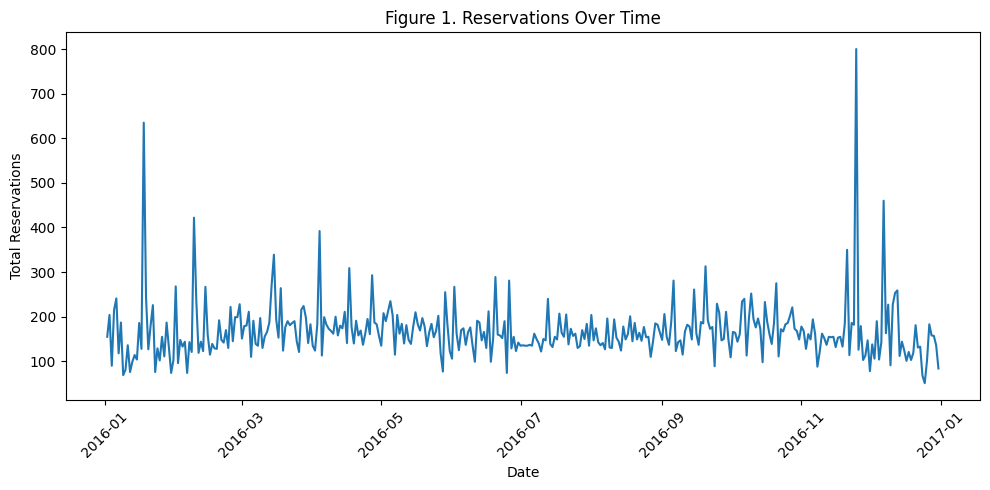

In [22]:
plt.figure(figsize=(10,5))

tmp = df.groupby("reservation_date")["reservation_count"].sum()

plt.plot(tmp.index, tmp.values)
plt.title("Figure 1. Reservations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Reservations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("figure1_reservations_over_time.png", dpi=200)
plt.show()


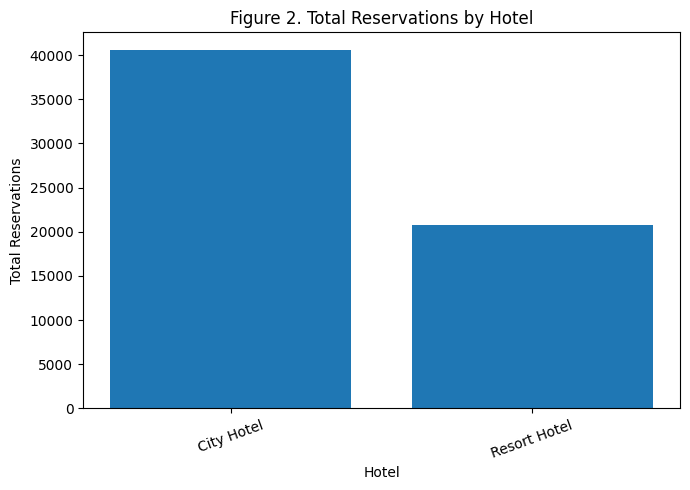

In [23]:
plt.figure(figsize=(7,5))

grp = df.groupby("hotel")["reservation_count"].sum().sort_values(ascending=False)

plt.bar(grp.index.astype(str), grp.values)
plt.title("Figure 2. Total Reservations by Hotel")
plt.xlabel("Hotel")
plt.ylabel("Total Reservations")
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("figure2_reservations_by_hotel.png", dpi=200)
plt.show()


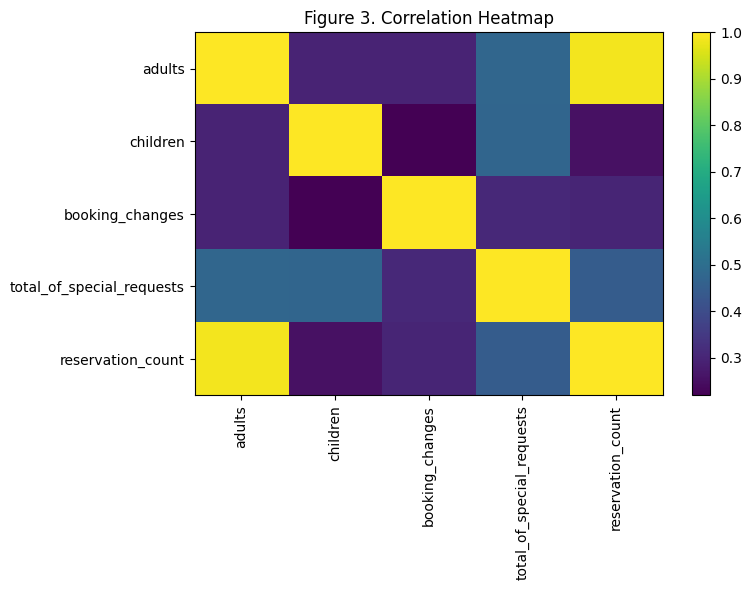

In [24]:
plt.figure(figsize=(8,6))

num_cols = ["adults", "children", "booking_changes", "total_of_special_requests", "reservation_count"]
corr = df[num_cols].corr()

plt.imshow(corr, cmap="viridis", aspect="auto")
plt.colorbar()
plt.title("Figure 3. Correlation Heatmap")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.tight_layout()
plt.savefig("figure3_correlation_heatmap.png", dpi=200)
plt.show()


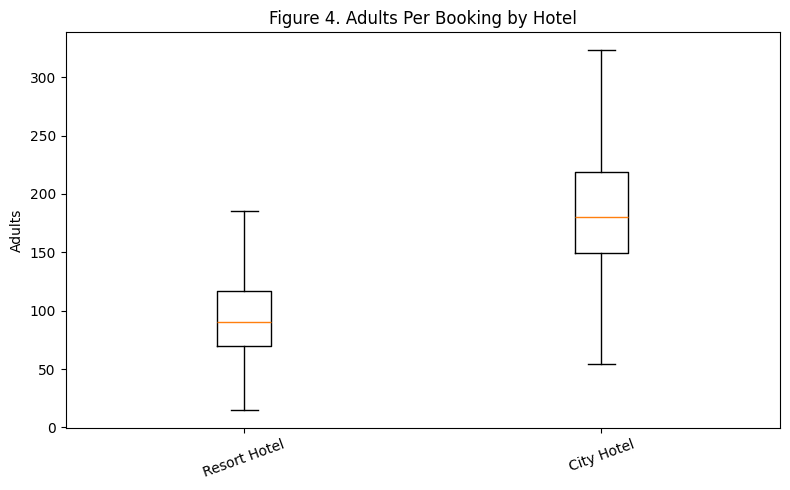

In [27]:
plt.figure(figsize=(8,5))

labels = df["hotel"].unique()
data = [df[df["hotel"] == h]["adults"].dropna() for h in labels]

plt.boxplot(data, tick_labels=labels, showfliers=False)
plt.title("Figure 4. Adults Per Booking by Hotel")
plt.ylabel("Adults")
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("figure4_adults_by_hotel.png", dpi=200)
plt.show()



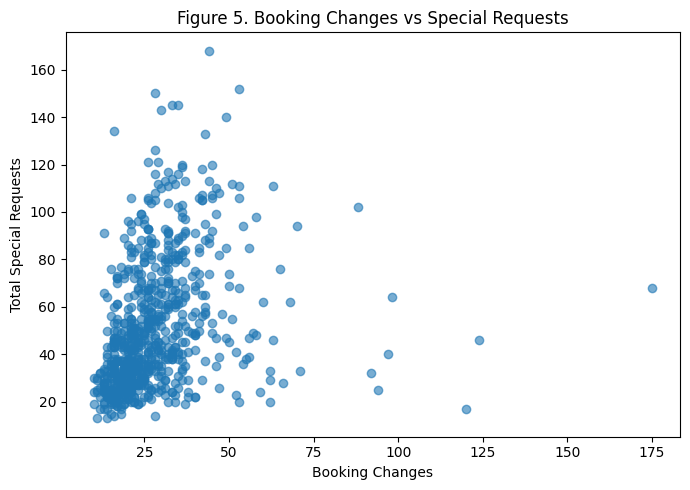

In [28]:
plt.figure(figsize=(7,5))

plt.scatter(df["booking_changes"], df["total_of_special_requests"], alpha=0.6)

plt.title("Figure 5. Booking Changes vs Special Requests")
plt.xlabel("Booking Changes")
plt.ylabel("Total Special Requests")
plt.tight_layout()
plt.savefig("figure5_changes_vs_requests.png", dpi=200)
plt.show()
